## Tom Brady data release Python introduction

##### By Will Morgan, Head of AMF Data Science, StatsBomb

Below we've included some sample code to load in the events and plays datasets, plot a field using our coordinate system and plot TB12's passes from our initial data release. Documentation for the dataset can be found [here](https://github.com/statsbomb/amf-open-data/tree/main/doc).

First we'll import the required libraries - you'll need to install these to your local Python environment before you begin if running locally.

In [1]:
from typing import Literal

import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

Below we load in the events and plays data direct from the [open data repository](https://github.com/statsbomb/amf-open-data).

In [3]:
event_files = [
    "https://raw.githubusercontent.com/statsbomb/amf-open-data/main/data/events/tb12_events_dataset_2021_2022.csv",
    "https://raw.githubusercontent.com/statsbomb/amf-open-data/main/data/events/tb12_events_dataset_2022_2023.csv",
]
play_files = [
    "https://raw.githubusercontent.com/statsbomb/amf-open-data/main/data/plays/tb12_plays_dataset_2021_2022.csv",
    "https://raw.githubusercontent.com/statsbomb/amf-open-data/main/data/plays/tb12_plays_dataset_2022_2023.csv",
    ]

events = pd.concat([pd.read_csv(file) for file in event_files])
plays = pd.concat([pd.read_csv(file) for file in play_files])


In [4]:
events.head()

,team_name,event_uuid,game_id,gsis_game_id,gsis_old_game_id,game_quarter,event_game_index,play_uuid,gsis_play_id,event_video_timestamp,game_clock,team_id,team_attacking_left_to_right,event_types,player_id,player_name,receiver_player_id,receiver_player_name,opponent_player_id,opponent_player_name,event_x,event_y,event_end_x,event_end_y,event_duration,event_success,event_points,event_catch_fail_type,event_yards_after_catch,event_kick_fail_type,event_kick_distance,event_kick_lateral,event_forced_fumble,event_pass_air_yards,event_pass_catchable,event_pass_time_to_throw,event_penalty_offset,event_penalty_yards,event_penalty_type,event_penalty_down_lost,event_penalty_replay_down,event_snap_under_center,event_tackle_contact,preceding_tackle_attempt_uuid,opposing_tackle_uuid,preceding_ball_origin_uuid,opposing_pressured_event_uuid,opposing_penalty_event_uuid,event_pass_underthrow,event_pass_overthrow,event_lateral_technique,event_pass_placement_x,event_pass_placement_y,event_score_fail_type,event_stoppage_review_outcome,event_pass_throwaway,event_pass_out_of_bounds,event_pass_touchdown,event_pass_target_x,event_pass_target_y,start_engagement_uuid,end_engagement_uuid,event_pass_yards_gained,base_event_uuid,event_tackle_first_contact,event_pass_placement_uncollectable,event_no_ff_cause,event_pass_placement_displacement,event_pass_comp_prob,event_catch_comp_with_placement,event_catch_comp_without_placement,event_offense_last_action,event_ball_x,event_ball_y,event_ball_carrier,event_tackle_type,event_tackle_sequence_attempt,season
0,Tampa Bay Buccaneers,973c7a4a-30d0-4846-b0c5-90262d4d3236,1072133,2021_19_PHI_TB,2.022012e+09,1,749,000eb548-6ce7-4c6d-b7fc-a707169147af,541.0,540.190302,427500.0,1000947,False,{Pathing},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.092292,29.340065,1003198.0,NaN,NaN,2021/2022
1,Tampa Bay Buccaneers,ab3254f1-dff2-4186-b711-2cc26b203788,1072133,2021_19_PHI_TB,2.022012e+09,1,754,000eb548-6ce7-4c6d-b7fc-a707169147af,541.0,540.689300,427001.0,1000947,False,{Pass},1003198.0,Tom Brady,1020841.0,Tyler Johnson,NaN,NaN,42.87,29.383333,55.71,30.343333,0.800986,False,0,NaN,NaN,NaN,NaN,NaN,NaN,5.56,NaN,1.99899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,1.0155,1.3477,NaN,NaN,False,False,False,56.299553,31.454041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.026857,0.749371,NaN,NaN,NaN,42.870000,29.383333,1003198.0,NaN,NaN,2021/2022
2,Tampa Bay Buccaneers,9dfb0183-625c-4dbb-85bc-6ba414e4cc29,1072133,2021_19_PHI_TB,2.022012e+09,1,760,000eb548-6ce7-4c6d-b7fc-a707169147af,541.0,541.240290,426450.0,1000947,False,{Catch},1020841.0,Tyler Johnson,NaN,NaN,NaN,NaN,55.71,30.343333,NaN,NaN,NaN,False,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ab3254f1-dff2-4186-b711-2cc26b203788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.640985,0.830194,NaN,55.710000,30.343333,NaN,NaN,NaN,2021/2022
3,Tampa Bay Buccaneers,438596c7-13e9-4ea1-9437-21eef80eb039,1072133,2021_19_PHI_TB,2.022012e+09,1,762,000eb548-6ce7-4c6d-b7fc-a707169147af,541.0,541.490286,426200.0,1000947,False,"{""Play End""}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021/2022
4,Tampa Bay Buccaneers,de358376-91fb-47f4-8810-2683bf652bae,1072133,2021_19_PHI_TB,2.022012e+09,1,759,000eb548-6ce7-4c6d-b7fc-a707169147af,541.0,541.090296,426600.0,1000947,False,{Pathing},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021/20

In [5]:
plays.head()

,offense_team_name,defense_team_name,season,week,play_uuid,gsis_play_id,game_id,gsis_game_id,gsis_old_game_id,drive_uuid,play_game_index,play_drive_index,play_quarter,play_quarter_clock_remaining,play_clock_paused,play_start_event_index,play_end_event_index,play_offense_team_id,play_offense_team_short_name,play_defense_team_id,play_defense_team_short_name,play_offense_is_home_team,play_down,play_yards_to_go,play_yardline,play_start_position,play_home_score,play_away_score,play_home_timeouts_remaining,play_away_timeouts_remaining,play_box_players,play_defensive_back_depths,play_linebacker_depths,play_shotgun,play_pre_snap_motion,play_snap_hurried,play_success,play_first_down_won,play_touchdown_won,play_yards_net,play_points_won,play_type,play_included_fake,play_qb_pressure,play_qb_hit,play_qb_sacked,play_pass_yards_air,play_pass_yards_after_catch,play_pass_outcome,play_pass_dropped,play_pass_intercepted,play_pass_interception_dropped,play_time_to_pass,play_pass_batted,play_yards_run,play_penalty_yards,play_penalty_first_down,play_penalty_down_loss,play_penalty_offset,play_return_yards,play_field_goal_result,play_extra_point_result,play_kick_yards,play_kick_hangtime,play_kick_blocked,play_kick_fair_catch,play_kick_downed,play_fumbled,play_fumble_forced,play_fumble_lost,play_fumble_out_of_bounds,play_challenged,play_action_pass,play_points_lost,play_start_position_yards,play_penalty_types,play_explosive,play_offensive_personnel,play_defensive_personnel,play_turnover_type,play_offense_penalty_accepted,play_defense_penalty_accepted,play_offense_flagged,play_defense_flagged,play_tackle_success,play_lateral_success,play_yards_gained,play_epoch_uuid,play_offense_players_left,play_offense_players_right,play_snap_y,play_down_negated,play_point_of_attack_y,play_point_of_attack_dy,play_pocket_front_x,play_pocket_back_x,play_pocket_left_y,play_pocket_right_y,play_qb_exit_pocket_x,play_qb_exit_pocket_y,play_qb_exit_pocket_clock,play_run_gap,play_qb_dropback_depth,play_run_behind_1,play_run_behind_2,play_run_at,play_receiver_screen_pass,play_derived_pressure_gaps,play_pass_air_yards_to_the_sticks,play_pass_within_pocket,play_designed_pass,play_qb_rush,play_pass_thrownaway,play_formation_into_boundary,play_blitz,play_simulated_pressure,play_drop_eight,play_pass_comp_prob,play_catch_prob_with_placement,play_catch_prob_without_placement,play_initial_formation_run_strength,play_initial_formation_pass_strength,play_initial_formation_snap_side,play_initial_formation_fib,play_formation_run_strength,play_formation_pass_strength,play_formation_fib,play_pass_location,play_initial_formation,play_formation,play_punt_snap_time,play_punt_operation_time,play_punt_hang_time,play_net_punt_yards,play_gross_punt_yards,play_punt_roll_yards,play_punt_air_yards,play_punt_return_yards,play_punt_block_point_x,play_punt_block_point_y,play_punt_outcome,play_kickoff_x,play_kickoff_y,play_kickoff_land_x,play_kickoff_land_y,play_kickoff_outcome,play_kick_hang_time,play_kickoff_return_yards,play_kickoff_return_chunk,play_kickoff_return_explosive,play_fg_snap_time,play_fg_operation_time,play_fg_attempted,play_fg_made,play_fg_kick_blocked,play_fg_length,play_xp_snap_time,play_xp_operation_time,play_xp_attempted,play_xp_made,play_xp_kick_blocked,play_motion_type,play_havoc,play_qb_scramble,play_contested_catch_attempt,play_pass_made,play_yards_after_contact,play_target_separation,play_pass_placement_displacement,play_tackle_types,play_catch_separation,play_handoff_received
0,Tampa Bay Buccaneers,Dallas Cowboys,2021/2022,Week 1,a7e97cac-bb9f-4c7a-82be-7410e02db170,40.0,1502044,2021_01_DAL_TB,2021090900,a7e97cac-bb9f-4c7a-82be-7410e02db170,1,1,1,900000.0,True,2,6,1000947,TB,1001367,DAL,True,NaN,NaN,64.85,NaN,0,0,3,3,0,NaN,NaN,NaN,False,False,NaN,False,False,NaN,0,Kickoff,False,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,0.00,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.00,0.0,NaN,NaN,False,False,False,False,False,False,NaN,0,0.000000,{},NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,0.

Now we join them up so we can do some quick analysis and plotting.

In [6]:
events = pd.merge(
    events,
    plays[["play_uuid", "play_yardline", "play_action_pass"]],
    on="play_uuid",
    how="left"
)

For the purposes of this demonstration, we're going to focus on Brady's passes, so we'll filter the data down to those.

N.B. The `event_types` column can contain multiple types per event, which can add a lot of context to the data.

In [7]:
tb_passes = events.query(
    "player_name == 'Tom Brady' and event_types.str.contains('Pass') and event_types.str.contains('Fake Pass') == 0"
).copy()
f"Number of passes: {len(tb_passes)}"

'Number of passes: 1675'

The following is a helper function to plot a field on an existing axis. There are options for the orientation of the field to be plotted, whether to use NFL or NCAA hash markings, colors and how to annotate yardlines.

In [8]:
X_MIN = -10
X_MAX = 110
Y_MIN = 0
Y_MAX = 160 / 3
Y_MID = (Y_MAX - Y_MIN) / 2

GOAL_WIDTH = 6.166667  # 18 feet 6 inches
LHS_POST = Y_MID - (GOAL_WIDTH / 2)
RHS_POST = Y_MID + (GOAL_WIDTH / 2)
CROSSBAR = 3.3  # 10 feet
POST_HEIGHT = 11.6667  # 35 feet

NFL_HASH = 23.583333  # 70 feet 9 inches
NCAA_HASH = 20.0  # 60 feet


def field(
    ax: plt.axes,
    orientation: Literal["horizontal", "vertical"],
    level: Literal["NFL", "NCAA"],
    background_color: str = "#F2F2F2",
    patch_color: str = "#CCCCCC",
    line_color: str = "#999999",
    normalise_los: bool = False,
) -> plt.axes:

    hash_mark = NCAA_HASH if level == "NCAA" else NFL_HASH
    hash_left = hash_mark
    hash_right = Y_MAX - hash_mark

    x_extent = [X_MIN, X_MIN, X_MIN, X_MAX, X_MAX, X_MAX, X_MAX, X_MIN]
    y_extent = [Y_MIN, Y_MAX, Y_MIN, Y_MIN, Y_MAX, Y_MAX, Y_MAX, Y_MAX]

    ax.plot(
        x_extent if orientation == "horizontal" else y_extent,
        y_extent if orientation == "horizontal" else x_extent,
        color=line_color,
        lw=1,
    )

    for b in [0.0, 100.0]:
        ax.plot(
            [b, b] if orientation == "horizontal" else [Y_MIN, Y_MAX],
            [Y_MIN, Y_MAX] if orientation == "horizontal" else [b, b],
            color=line_color,
            lw=1,
            zorder=1,
        )

    canvas = patches.Rectangle(
        (0, 0),
        100 if orientation == "horizontal" else Y_MAX,
        Y_MAX if orientation == "horizontal" else 100,
        linewidth=0.1,
        edgecolor=line_color,
        facecolor=background_color,
        zorder=0,
    )
    ax.add_patch(canvas)

    for n, line in enumerate(np.arange(0.0, 100.0, 10)):
        ax.plot(
            [line, line] if orientation == "horizontal" else [Y_MIN, Y_MAX],
            [Y_MIN, Y_MAX] if orientation == "horizontal" else [line, line],
            color=line_color,
            zorder=1,
            alpha=0.5,
        )
        if n % 2 == 0:
            patch = patches.Rectangle(
                (line, Y_MIN) if orientation == "horizontal" else (Y_MIN, line),
                10 if orientation == "horizontal" else Y_MAX,
                Y_MAX if orientation == "horizontal" else 10,
                linewidth=0.1,
                edgecolor=line_color,
                facecolor=patch_color,
                zorder=1,
            )
            ax.add_patch(patch)

    for dash_line in np.arange(5.0, 100.0, 5):
        ax.plot(
            [dash_line, dash_line] if orientation == "horizontal" else [Y_MIN, Y_MAX],
            [Y_MIN, Y_MAX] if orientation == "horizontal" else [dash_line, dash_line],
            ls="--",
            color=line_color,
            lw=1.0,
            alpha=0.5,
            zorder=1,
        )

    for x in np.linspace(1, 99, 99):
        ax.plot(
            [x, x] if orientation == "horizontal" else [Y_MIN, 0.7],
            [Y_MIN, 0.7] if orientation == "horizontal" else [x, x],
            color=line_color,
            lw=1.0,
            alpha=0.5,
            zorder=1,
        )
        ax.plot(
            [x, x] if orientation == "horizontal" else [Y_MAX, Y_MAX - 0.7],
            [Y_MAX, Y_MAX - 0.7] if orientation == "horizontal" else [x, x],
            color=line_color,
            lw=1.0,
            alpha=0.5,
            zorder=1,
        )
        ax.plot(
            [x, x] if orientation == "horizontal" else [hash_left, hash_left - 0.7],
            [hash_left, hash_left - 0.7] if orientation == "horizontal" else [x, x],
            color=line_color,
            lw=1.0,
            alpha=0.5,
            zorder=1,
        )
        ax.plot(
            [x, x] if orientation == "horizontal" else [hash_right, hash_right + 0.7],
            [hash_right, hash_right + 0.7] if orientation == "horizontal" else [x, x],
            color=line_color,
            lw=1.0,
            alpha=0.5,
            zorder=1,
        )

    coords = [10, 20, 30, 40, 50, 60, 70, 80, 90]
    values = (
        ["10", "20", "30", "40", "50", "40", "30", "20", "10"]
        if normalise_los is False
        else ["-10", "LOS", "10", "20", "30", "40", "50", "60", "70"]
    )
    for x, v in zip(coords, values):
        ax.annotate(
            v,
            (x, Y_MAX + 1.5) if orientation == "horizontal" else (Y_MAX + 2, x),
            ha="center",
            va="center",
            color=line_color,
        )
        ax.annotate(
            v,
            (x, Y_MIN - 1.5) if orientation == "horizontal" else (Y_MIN - 2, x),
            ha="center",
            va="center",
            color=line_color,
        )

    ax.axis("off")

    return ax

For the following analysis, we're going to dig into Brady's passes when the Buccaneers ran their offense with and without play action.

We can perform a basic analysis of Brady's tendencies and performance with and without play action by grouping on the `play_action_pass` variable, including a calcuation of Brady's expected completion probability and completion percentage above expectation (CPOE). See [here](https://statsbomb.com/articles/football/2023-nfl-draft-examining-the-passing-profile-and-accuracy-of-the-top-quarterback-prospects/) for more on our completion probability models.

N.B. We filter the passes here to those with an `event_pass_comp_prob` present, as passes without a receiver identified are nulls in the data as receiver separation and distance from the QB are key features of the model.

In [9]:
play_action = (
    tb_passes.query("event_pass_comp_prob > 0")
    .groupby("play_action_pass", as_index=False)
    .agg(
        {
            "event_uuid": "count",
            "event_pass_time_to_throw": "mean",
            "event_pass_air_yards": "mean",
            "event_pass_comp_prob": "mean",
            "event_success": "mean",
        }
    )
)
play_action["cpoe"] = (
    play_action["event_success"] - play_action["event_pass_comp_prob"]
) * 100
play_action

,play_action_pass,event_uuid,event_pass_time_to_throw,event_pass_air_yards,event_pass_comp_prob,event_success,cpoe
0,False,1408,2.396668,7.362438,0.674910,0.674006,-0.090421
1,True,229,2.804764,9.170318,0.667516,0.615721,-5.179520


As might be expected, Brady's time to throw and air yards are longer on play action passes, while the expected completion rate is a little lower. These are small sample sizes, but intriguingly, his CPOE is significantly lower on play action passes.


We calculate their play action rate on Brady's passing plays in the cell below so we can use it in the subplot titles below.

In [10]:
play_action_prop = tb_passes["play_action_pass"].mean()
f"Play action rate: {play_action_prop:.1%}"

'Play action rate: 14.0%'

In order to make the plots look cleaner and more interpretable, we'll add columns to normalise the `event_x` and `event_end_x` coordinates to the line-of-scrimmage, plus a buffer of 20 yards to align with the field plot nicely.

In [11]:
tb_passes["event_x_norm"] = tb_passes["event_x"] - tb_passes["play_yardline"] + 20
tb_passes["event_end_x_norm"] = (
    tb_passes["event_end_x"] - tb_passes["play_yardline"] + 20
)

First, let's plot a spray chart of his passes with the x-coordinate normalised to the line-of-scrimmage.

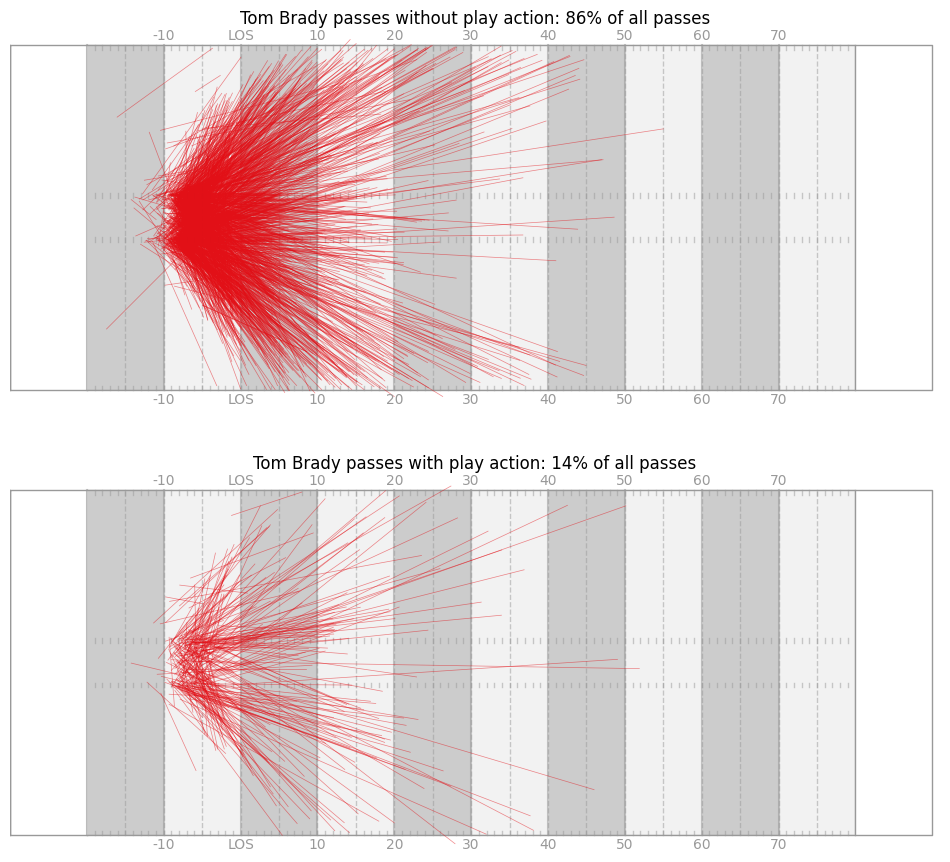

In [12]:
fig, _ = plt.subplots(2, 1, figsize=(12, 10.6))

for ax, (play_action, passes) in zip(fig.axes, tb_passes.groupby("play_action_pass")):
    field(ax, orientation="horizontal", level="NFL", normalise_los=True)

    for sx, ex, sy, ey in zip(
        passes["event_x_norm"],
        passes["event_end_x_norm"],
        passes["event_y"],
        passes["event_end_y"],
    ):
        ax.plot([sx, ex], [sy, ey], color="#e21017", lw=0.5, alpha=0.5)

    ax.set_xlim(-10, 111)
    ax.set_ylim(Y_MIN - 2, Y_MAX + 2)
    ax.set_title(
        f"Tom Brady passes with play action: {play_action_prop:.0%} of all passes"
        if play_action == 1
        else f"Tom Brady passes without play action: {1-play_action_prop:.0%} of all passes"
    )

The above is nice but the density of passes can make things a little hard to decipher and Brady's tendency to stay in the pocket means that the start locations of the passes provides limited interest.

Let's plot the end locations as a heatmap to see if we can observe any clearer patterns.

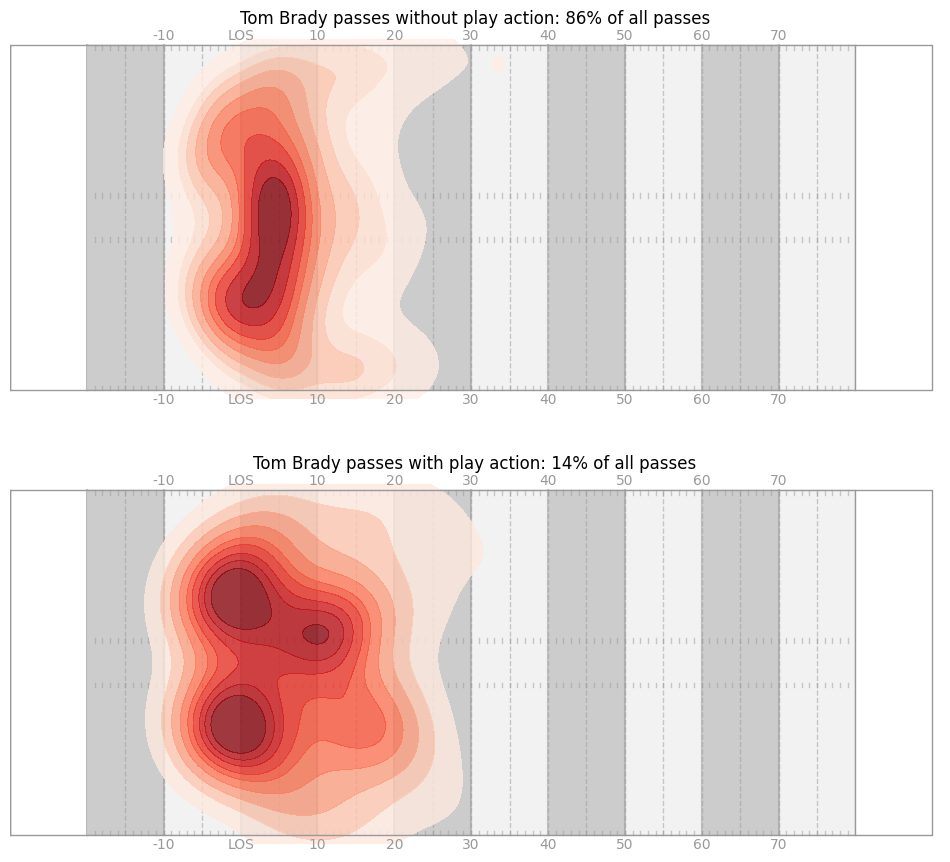

In [13]:
fig, _ = plt.subplots(2, 1, figsize=(12, 10.6))
for ax, (play_action, passes) in zip(fig.axes, tb_passes.groupby("play_action_pass")):
    field(ax, orientation="horizontal", level="NFL", normalise_los=True)

    sns.kdeplot(
        passes,
        x="event_end_x_norm",
        y="event_end_y",
        ax=ax,
        fill=True,
        alpha=0.8,
        cmap="Reds",
        clip=(tb_passes["event_end_y"].min(), tb_passes["event_end_y"].max()),
    )

    ax.set_xlim(-10, 111)
    ax.set_ylim(Y_MIN - 2, Y_MAX + 2)
    ax.set_title(
        f"Tom Brady passes with play action: {play_action_prop:.0%} of all passes"
        if play_action == 1
        else f"Tom Brady passes without play action: {1-play_action_prop:.0%} of all passes"
    )

Now things are clearer in terms of Brady's tendencies with and without play action:
* Deeper shots downfield with play action, in line with the average air yards calculated above, alongside more passes behind or on the line-of-scrimmage
* Without play action, he has a clear hot spot over the middle extending to his right
* With play action, there is a greater concentration to his left that extends from behind the line-of-scrimmage through intermediate lengths around 10-yards downfield


That wraps up our brief exploration of the dataset in Python. We've only scratched the surface of the data and what can be done with it.

We look forward to seeing what further insights can be found in the data!